# Aviation Risk and Investing Analysis
![Plane Lot](https://hips.hearstapps.com/hmg-prod/images/rear-view-silhouette-of-an-airplane-taking-off-at-royalty-free-image-1695239529.jpg)

## Business Understanding
This project analyizes 88,889 aviation accidents from National Transportation Safety Board from 1962 to 2023 for private and commercial airplanes. These accidents range in severity from fatal to uninjured passengers, we're  analyzing risk by type, injury/fatality rate and location to provide recommendations for the business on the aircraft with the lowest risk and safest investment.

# Data Understanding

The National Transportation Safety Board report is the most comprehensive dataset on aviation accidents with 88,889 instances recored from 1962 to 2023, ranging from domestic/internal flights, commercial vs private, location, weather conditions and injury statistics (number of fatal, serious, minor and uninjured passangers) for each incident are provided. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
aviation_data  = pd.read_csv('data/AviationData.csv',encoding='latin-1',low_memory=False)
state_codes = pd.read_csv('data/USState_Codes.csv')

## Aviation Data
The aviation_data dataset contains 88,889 recorded aviation accidents from 1962 to 2023, ranging from uninjured incidents to fatal accidents. 

In [3]:
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/48,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/62,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/74,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/77,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/00
4,20041105X01764,Accident,CHI79FA064,8/2/79,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/48,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/62,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/74,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/77,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/00
4,20041105X01764,Accident,CHI79FA064,8/2/79,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
aviation_data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [7]:
state_codes.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [8]:
state_codes.describe()

,US_State,Abbreviation
count,62,62
unique,62,62
top,West Virginia,ND
freq,1,1


In [9]:
aviation_data['Investigation.Type'].value_counts()
# Accident: 85015
# Incident: 3874

Accident    85015
Incident     3874
Name: Investigation.Type, dtype: int64

In [10]:
aviation_data['Make'].value_counts()

Cessna                 22227
Piper                  12029
CESSNA                  4922
Beech                   4330
PIPER                   2841
                       ...  
TOP DOG                    1
Winchester                 1
Bohner                     1
LIBERTY AEROSPACE          1
Worldwide Aero Corp        1
Name: Make, Length: 8237, dtype: int64

In [11]:
aviation_data['Broad.phase.of.flight'].value_counts()

Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

## Data Preperation and Merging

In [12]:
#Cleaning the date format of Event.Date to YYYY-MM-DD
aviation_data['Event.Date'] = pd.to_datetime(aviation_data['Event.Date'])
aviation_data['Event.Date'] = aviation_data['Event.Date'].dt.strftime('%Y-%m-%d')

In [13]:
# Create a State column for in the aviation_data to join on state_codes
avaiation_US = aviation_data[aviation_data['Country']=='United States']
aviation_data['State'] = avaiation_US['Location'].str[-2:]

In [14]:
aviation_data[aviation_data['Country']=='United States']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State
0,20001218X45444,Accident,SEA87LA080,2048-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,ID
1,20001218X45447,Accident,LAX94LA336,2062-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/00,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,2.02212E+13,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,MD
88885,2.02212E+13,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NH
88886,2.02212E+13,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,AZ
88887,2.02212E+13,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,UT


In [15]:
# Make column names easier to use (caused error's when rerunning cells)
# aviation_data.columns = aviation_data.columns.str.lower().str.replace(' ', '_')
# state_codes.columns = state_codes.columns.str.lower().str.replace(' ', '_')
print(aviation_data.columns)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'State'],
      dtype='object')


#### Drop columns in aviation_data that are mostly null or not appliable to the risk analysis

- Latitude                34382 non-null   
- Longitude               34373 non-null  
- Aircraft.Category       32287 non-null   
- FAR.Description         32023 non-null   
- 2Schedule               12582 non-null   

In [16]:
null_columns = ['Latitude', 'Longitude','Aircraft.Category','FAR.Description','Schedule']
aviation_data = aviation_data.drop(columns=null_columns)

The injury columns are the primary metrics of the analysis that will help assess risk. We'll need to handle update null values with data points that will not sku the injury data

In [17]:
aviation_data['Total.Fatal.Injuries'].describe()
# There is a large outlier that sku the mean up, in most instances a fatality does not occur and the 
# median will be used to fill null data for Total.Fatal.Injuries
# aviation_data['Total.Fatal.Injuries'].fillna(aviation_data['Total.Fatal.Injuries'].median())

count    77488.000000
mean         0.647855
std          5.485960
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        349.000000
Name: Total.Fatal.Injuries, dtype: float64

In [18]:
aviation_data['Total.Serious.Injuries'].describe()
# There is a large outlier that sku the mean up, in most instances a serious injuries does not occur and the 
# median will be used to fill null data for Total.Serious.Injuries
aviation_data['Total.Serious.Injuries'].fillna(aviation_data['Total.Serious.Injuries'].median())

0        0.0
1        0.0
2        0.0
3        0.0
4        2.0
        ... 
88884    1.0
88885    0.0
88886    0.0
88887    0.0
88888    1.0
Name: Total.Serious.Injuries, Length: 88889, dtype: float64

In [19]:
aviation_data['Total.Minor.Injuries'].describe()
# There is a large outlier that sku the mean up, in most instances a Minor injuries does not occur and the 
# median will be used to fill null data for Total.Minor.Injuries
aviation_data['Total.Minor.Injuries'].fillna(aviation_data['Total.Minor.Injuries'].median())


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
88884    0.0
88885    0.0
88886    0.0
88887    0.0
88888    0.0
Name: Total.Minor.Injuries, Length: 88889, dtype: float64

In [20]:
aviation_data['Total.Uninjured'].describe()
# There is a large outlier that sku the mean up, in most instances a Uninjured does not occur and the 
# median will be used to fill null data for Total.Uninjured. There is a large standard deviation, meaning there is more 
#spread in the data. To remain consistent we're going to use the median.
aviation_data['Total.Uninjured'].fillna(aviation_data['Total.Uninjured'].median())

0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
88884    0.0
88885    0.0
88886    1.0
88887    0.0
88888    1.0
Name: Total.Uninjured, Length: 88889, dtype: float64

### Merging Data
Merging avaiation_data against the state_codes to pull in state names for accidents that occured in the United States. 

In [26]:
# aviation_data.set_index('State')
# state_codes.set_index('Abbreviation', inplace=True)

In [27]:
# Merging 
aviation_accidents = pd.merge(aviation_data, state_codes, how='left', left_on='State', right_on='Abbreviation')
aviation_accidents.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State,US_State,Abbreviation
0,20001218X45444,Accident,SEA87LA080,2048-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,...,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,ID,Idaho,ID
1,20001218X45447,Accident,LAX94LA336,2062-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,...,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,CA,California,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,NaN,Fatal(3),Destroyed,...,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,VA,Virginia,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,...,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/00,CA,California,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,...,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,OH,Ohio,OH


# Exploratory Data Analysis

With a merged dataset, we can now groupby Make, State, Purpose.of.flight to assess the mean, median, standard deviation and totals injuries to calculate which aircraft is the best investment and lowest risk. The two metrics that we're going to assess risk by is Purpose.of.flight (commercial, private, skydiving ect) then once we determine which purpose is the lowest risk we're going to determine which model within the lowest risk purpose category is best. We will also be adding in the count to assure we're removing any data points that are statistically insignifiant, we're only considering instances where the count occured over 30 times to be statistically signifigant. 

In [84]:
aviation_grouped_make_data = aviation_accidents.groupby(['Make'])['Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured'].agg(['sum', 'mean', 'std', 'min', 'max']).reset_index()
aviation_grouped_make_data['Count'] = aviation_accidents.groupby('Make').size().reset_index(name='Count')['Count']
aviation_grouped_purpose_data = aviation_accidents.groupby(['Purpose.of.flight'])['Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured'].agg(['sum', 'mean', 'std', 'min', 'max']).reset_index()
aviation_grouped_purpose_data['Count'] = aviation_accidents.groupby('Purpose.of.flight').size().reset_index(name='Count')['Count']
aviation_grouped_date

<ipython-input-84-b265df2b57b3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  aviation_grouped_make_data = aviation_accidents.groupby(['Make'])['Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured'].agg(['sum', 'mean', 'std', 'min', 'max']).reset_index()
<ipython-input-84-b265df2b57b3>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  aviation_grouped_purpose_data = aviation_accidents.groupby(['Purpose.of.flight'])['Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured'].agg(['sum', 'mean', 'std', 'min', 'max']).reset_index()


Make Purpose.of.flight Total.Fatal.Injuries       \
                                                                   sum mean   
0      107.5 Flying Corporation          Personal                  1.0  1.0   
1                          1200          Personal                  0.0  NaN   
2                     177MF LLC          Personal                  0.0  0.0   
3              1977 Colfer-chan          Personal                  0.0  NaN   
4                    1st Ftr Gp          Personal                  1.0  1.0   
...                         ...               ...                  ...  ...   
10217                     Zwart          Personal                  0.0  0.0   
10218              de Havilland          Personal                  0.0  0.0   
10219              de Havilland       Positioning                  0.0  0.0   
10220              de Havilland         Skydiving                  0.0  0.0   
10221                   unknown          Personal                  0.0  0.0   

                     Total.Serious.Injuries            ...  \
       std  min  max                    sum mean  std  ...   
0      NaN  1.0  1.0                    0.0  NaN  NaN  ...   
1      NaN  NaN  NaN                    1.0  1.0  NaN  ...   
2      NaN  0.0  0.0                    2.0  2.0  NaN  ...   
3      NaN  NaN  NaN                    0.0  NaN  NaN  ...   
4      NaN  1.0  1.0                    0.0  0.0  NaN  ...   
...    ...  ...  ...                    ...  ...  ...  ...   
10217  NaN  0.0  0.0                    0.0  0.0  NaN  ...   
10218  0.0  0.0  0.0                    0.0  0.0  0.0  ...   
10219  0.0  0.0  0.0                    0.0  0.0  0.0  ...   
10220  NaN  0.0  0.0                    0.0  0.0  NaN  ...   
10221  NaN  0.0  0.0                    0.0  0.0  NaN  ...   

      Total.Minor.Injuries                     Total.Uninjured        \
                       sum mean  std  min  max             sum  mean   
0                      0.0  NaN  NaN  NaN  NaN             0.0   NaN   
1                      0.0  NaN  NaN  NaN  NaN             0.0   NaN   
2                      0.0  0.0  NaN  0.0  0.0             0.0   0.0   
3                      1.0  1.0  NaN  1.0  1.0             0.0   NaN   
4                      0.0  0.0  NaN  0.0  0.0             0.0   0.0   
...                    ...  ...  ...  ...  ...             ...   ...   
10217                  0.0  0.0  NaN  0.0  0.0             2.0   2.0   
10218                  0.0  0.0  0.0  0.0  0.0             3.0   1.5   
10219                  0.0  0.0  0.0  0.0  0.0             3.0   1.5   
10220                  0.0  0.0  NaN  0.0  0.0            15.0  15.0   
10221                  1.0  1.0  NaN  1.0  1.0             0.0   0.0   

                             
            std   min   max  
0           NaN   NaN   NaN  
1           NaN   NaN   NaN  
2           NaN   0.0   0.0  
3           NaN   NaN   NaN  
4           NaN   0.0   0.0  
...         ...   ...   ...  
10217       NaN   2.0   2.0  
10218  0.707107   1.0   2.0  
10219  0.707107   1.0   2.0  
10220       NaN  15.0  15.0  
10221       NaN   0.0   0.0  

[10222 rows x 22 columns]

In [75]:
#columns are not flat due to group by and aggregate functions
aviation_grouped_make_data.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in aviation_grouped_make_data.columns.values]
aviation_grouped_purpose_data.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in aviation_grouped_purpose_data.columns.values]

In [80]:
aviation_grouped_make_sorted = aviation_grouped_make_data.sort_values(by='Total.Fatal.Injuries_mean', ascending=True)
aviation_grouped_make_filtered = aviation_grouped_make_sorted[aviation_grouped_make_sorted['Count']>30]
# aviation_grouped_purpose_data.head
aviation_grouped_make_filtered

,Make,Total.Fatal.Injuries_sum,Total.Fatal.Injuries_mean,Total.Fatal.Injuries_std,Total.Fatal.Injuries_min,Total.Fatal.Injuries_max,Total.Serious.Injuries_sum,Total.Serious.Injuries_mean,Total.Serious.Injuries_std,Total.Serious.Injuries_min,...,Total.Minor.Injuries_mean,Total.Minor.Injuries_std,Total.Minor.Injuries_min,Total.Minor.Injuries_max,Total.Uninjured_sum,Total.Uninjured_mean,Total.Uninjured_std,Total.Uninjured_min,Total.Uninjured_max,Count
2929,GRUMMAN ACFT ENG COR-SCHWEIZER,1.0,0.017241,0.131306,0.0,1.0,11.0,0.189655,0.395452,0.0,...,0.120690,0.328611,0.0,1.0,39.0,0.672414,0.473432,0.0,1.0,58
6176,Raven,4.0,0.049383,0.269316,0.0,2.0,71.0,0.845238,1.092075,0.0,...,0.500000,0.932936,0.0,4.0,197.0,2.290698,2.096868,0.0,9.0,86
6717,STINSON,5.0,0.054945,0.345210,0.0,3.0,35.0,0.384615,0.711325,0.0,...,0.109890,0.406900,0.0,2.0,109.0,1.197802,1.035157,0.0,4.0,91
1434,COSTRUZIONI AERONAUTICHE TECNA,2.0,0.064516,0.249731,0.0,1.0,6.0,0.193548,0.401610,0.0,...,0.032258,0.179605,0.0,1.0,35.0,1.129032,0.763411,0.0,2.0,31
3176,Grumman-schweizer,7.0,0.081395,0.314927,0.0,2.0,9.0,0.105882,0.345844,0.0,...,0.281250,0.451969,0.0,1.0,82.0,0.752294,0.433674,0.0,1.0,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,AIRBUS,1212.0,4.828685,27.914701,0.0,228.0,179.0,0.713147,3.618478,0.0,...,0.286853,1.524922,0.0,22.0,16759.0,66.768924,100.885610,0.0,576.0,251
357,Airbus,113.0,4.913043,23.562129,0.0,113.0,13.0,0.565217,1.878735,0.0,...,1.478261,5.367152,0.0,26.0,4502.0,121.675676,96.282586,0.0,324.0,40
2722,Fokker,217.0,4.931818,17.587519,0.0,97.0,89.0,2.069767,9.639688,0.0,...,1.476190,3.472808,0.0,14.0,2884.0,52.436364,61.692416,0.0,421.0,58
1066,Boeing,6532.0,5.837355,28.259126,0.0,349.0,936.0,0.805508,4.399127,0.0,...,2.141476,13.626963,0.0,380.0,132037.0,92.333566,105.103301,0.0,699.0,1594


In [87]:
filtered_make = aviation_data[aviation_data['Make']=='GRUMMAN ACFT ENG COR-SCHWEIZER']

66733    Aerial Application
66966    Aerial Application
66979    Aerial Application
66980    Aerial Application
67149    Aerial Application
67678                 Ferry
67737    Aerial Application
68028    Aerial Application
68032           Positioning
68305    Aerial Application
68327    Aerial Application
68473    Aerial Application
68501    Aerial Application
68558    Aerial Application
68756    Aerial Application
68817    Aerial Application
69859    Aerial Application
69937           Positioning
70127    Aerial Application
70550    Aerial Application
70584    Aerial Application
70689    Aerial Application
71858    Aerial Application
72009    Aerial Application
72167    Aerial Application
72298    Aerial Application
72801    Aerial Application
73273    Aerial Application
73671    Aerial Application
73858    Aerial Application
74195    Aerial Application
75267    Aerial Application
75271    Aerial Application
75395    Aerial Application
75420    Aerial Application
75442               

In [79]:
#add the count of each occurence to the grouped by Data set

aviation_grouped_purpose_sorted = aviation_grouped_purpose_data.sort_values(by='Total.Fatal.Injuries_mean', ascending=True)
aviation_grouped_purpose_sorted
aviation_grouped_purpose_filtered = aviation_grouped_purpose_sorted[aviation_grouped_purpose_sorted['Count']>30]
aviation_grouped_purpose_filtered

,Purpose.of.flight,Total.Fatal.Injuries_sum,Total.Fatal.Injuries_mean,Total.Fatal.Injuries_std,Total.Fatal.Injuries_min,Total.Fatal.Injuries_max,Total.Serious.Injuries_sum,Total.Serious.Injuries_mean,Total.Serious.Injuries_std,Total.Serious.Injuries_min,...,Total.Minor.Injuries_mean,Total.Minor.Injuries_std,Total.Minor.Injuries_min,Total.Minor.Injuries_max,Total.Uninjured_sum,Total.Uninjured_mean,Total.Uninjured_std,Total.Uninjured_min,Total.Uninjured_max,Count
1,Aerial Application,549.0,0.130870,0.361193,0.0,3.0,595.0,0.142823,0.358073,0.0,...,0.187530,0.404645,0.0,5.0,2944.0,0.659794,0.495568,0.0,3.0,4712
22,Public Aircraft - Local,13.0,0.196970,0.532619,0.0,2.0,49.0,0.720588,1.244038,0.0,...,0.279412,0.709122,0.0,3.0,96.0,1.352113,1.493783,0.0,8.0,74
14,Instructional,1913.0,0.212863,0.701798,0.0,17.0,1532.0,0.171173,0.491265,0.0,...,0.227745,0.559741,0.0,6.0,12580.0,1.243083,0.887596,0.0,8.0,10601
6,Banner Tow,19.0,0.240506,0.511789,0.0,2.0,31.0,0.382716,0.560533,0.0,...,0.123457,0.331010,0.0,1.0,52.0,0.590909,0.580059,0.0,2.0,101
13,Glider Tow,16.0,0.363636,0.613450,0.0,3.0,11.0,0.244444,0.434613,0.0,...,0.159091,0.369989,0.0,1.0,32.0,0.640000,0.776176,0.0,3.0,53
9,External Load,39.0,0.364486,0.692174,0.0,4.0,28.0,0.261682,0.571929,0.0,...,0.324324,0.558605,0.0,2.0,69.0,0.610619,0.687044,0.0,2.0,123
4,Air Race show,42.0,0.424242,0.554957,0.0,2.0,16.0,0.161616,0.421539,0.0,...,0.202020,0.473368,0.0,2.0,65.0,0.656566,1.108056,0.0,9.0,99
18,Personal,18762.0,0.434165,1.024453,0.0,82.0,10611.0,0.249500,0.610787,0.0,...,0.301863,0.749714,0.0,62.0,52052.0,1.131811,2.454274,0.0,412.0,49448
23,Public Aircraft - State,23.0,0.450980,0.986179,0.0,4.0,26.0,0.490566,0.992717,0.0,...,0.481481,1.224602,0.0,7.0,65.0,1.120690,1.044242,0.0,4.0,64
12,Flight Test,130.0,0.451389,0.886050,0.0,7.0,90.0,0.314685,0.585432,0.0,...,0.292517,0.678393,0.0,6.0,461.0,1.431677,9.967704,0.0,179.0,405


## Summary and Analysis
Based on our analysis looking by looking at the mean fatality rate by Purpose of Flight and Aircraft and filtering for datapoints with over 30 occurences for statistical signfigance. 

I recommend the business invest in Aerial Applications with the lowest mean fatality rate of any flight type at %13.0870 with 4712 recorded instances and the 'GRUMMAN ACFT ENG COR-SCHWEIZER' make which has the lowest fatality rate of any make  with a average fatality of %1.7241 when an accident does occur. 

## Analysis

In [108]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

The bar chart below will show a visual comparison of the total accidents against total fatalities grouped by Purpose of Flight. This will indicate a high level which type of flight has the highest occurence off accidents and of those accidents, how often fatalities are involved. Personal flight are by far the most common reason for traveling and have the highest occurence of accidents and a relatively high number of fatalies relative to accidents. This bar chart confirms what the mean data verified is that Ariel Application is the safest investment relative to likelyhood a fatality will occur when an accident happens.  

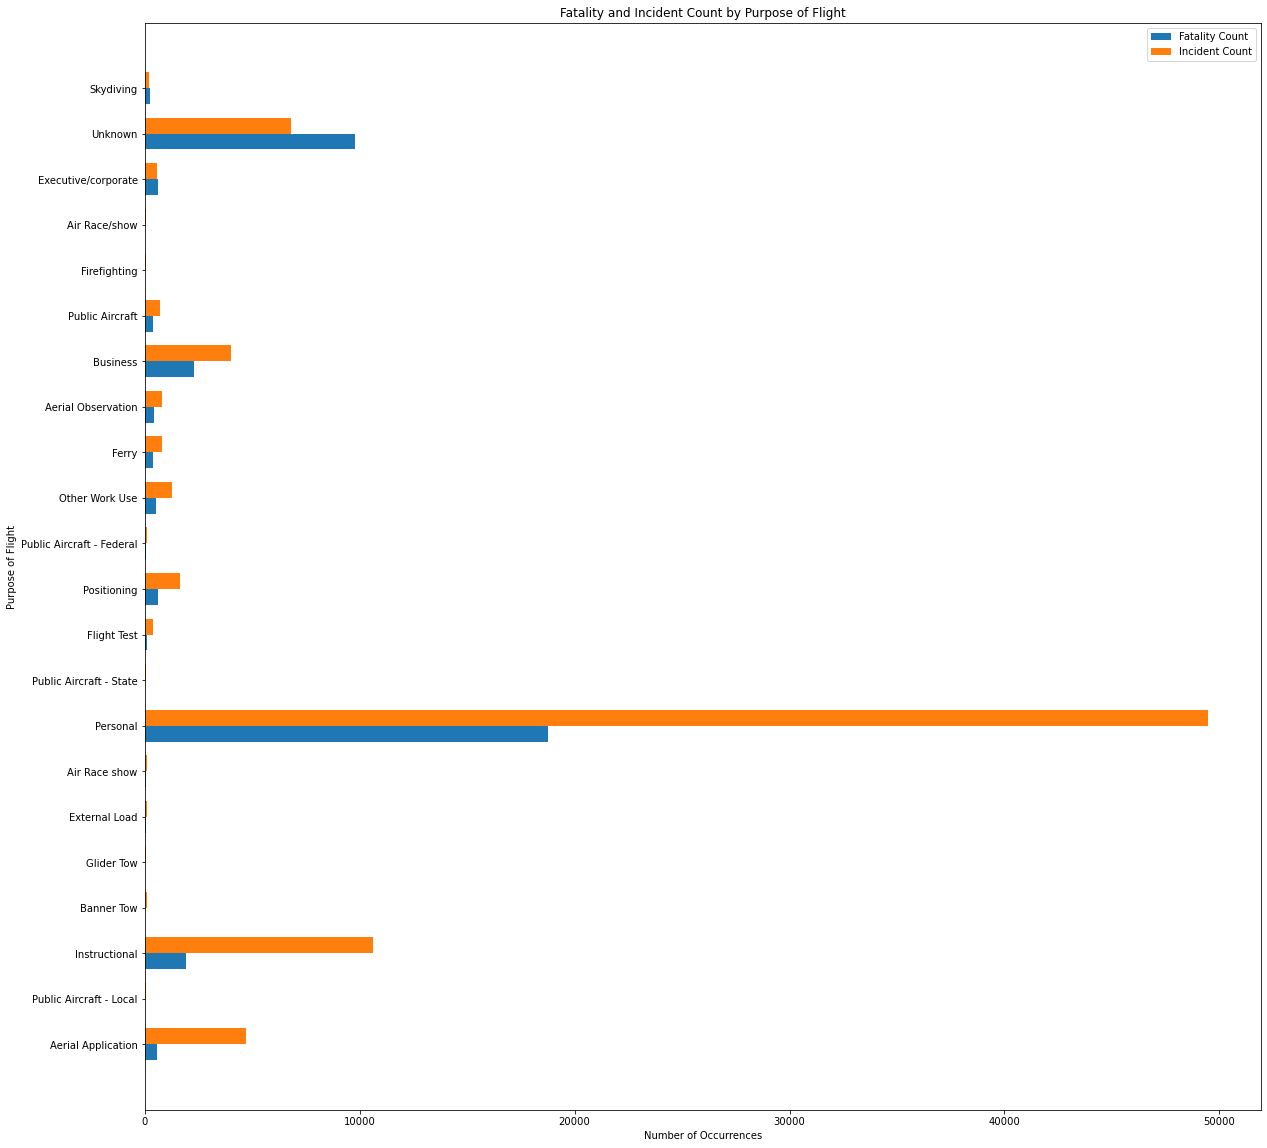

In [107]:
# Set the width and height of the figure
fig, ax = plt.subplots(figsize=(20, 20))

# Set the height of the bars
bar_height = 0.35

# Set the positions of the bars on the y-axis
r1 = np.arange(len(aviation_grouped_purpose_filtered['Purpose.of.flight']))
r2 = [y + bar_height for y in r1]

# Creating a horizontal bar chart with two bars for each category
plt.barh(r1, aviation_grouped_purpose_filtered['Total.Fatal.Injuries_sum'], height=bar_height, label='Fatality Count')
plt.barh(r2, aviation_grouped_purpose_filtered['Count'], height=bar_height, label='Incident Count')

# Adding labels and title
plt.ylabel('Purpose of Flight')
plt.xlabel('Number of Occurrences')
plt.title('Fatality and Incident Count by Purpose of Flight')

# Adding y-axis tick labels
plt.yticks([y + bar_height / 2 for y in range(len(aviation_grouped_purpose_filtered['Purpose.of.flight']))], aviation_grouped_purpose_filtered['Purpose.of.flight'])

# Adding legend
plt.legend()

# Displaying the chart
plt.show()


The 